In [1]:
from MinorityGame import MinorityGame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
help(MinorityGame)

Help on class MinorityGame in module MinorityGame.minority_game:

class MinorityGame(builtins.object)
 |  MinorityGame(N_agents: int, memory_span: int, n_strategies: int) -> None
 |  
 |  An implementation of the minority game.
 |  
 |  N agents in Santa Fe decide each day whether they should go to the El Farol
 |  bar or if they should rather stay at home. This is a binary decision.
 |  
 |  For an agent, the winning choice is that of the minority: go to the bar if
 |  it's not too crowded, otherwise stay at home.
 |  
 |  Agents decide what to do based on past observations: they look at the M last
 |  days and decide what to do based on their strategies.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, N_agents: int, memory_span: int, n_strategies: int) -> None
 |      Initialise a minority game instance.
 |      
 |      Parameters
 |      ----------
 |      N : int
 |          Number of agents in the game.
 |      M : int
 |          Memory span of the agents: how far back to

In [3]:
sim = MinorityGame(N_agents=101,
                  memory_span=3,
                  n_strategies=2)

In [4]:
help(sim.run)

Help on method run in module MinorityGame.minority_game:

run(T: int) -> Tuple[numpy.ndarray, numpy.ndarray] method of MinorityGame.minority_game.MinorityGame instance
    Run the simulation over T timesteps
    
    Parameters
    ----------
    T : int
        Number of timesteps over which to run the simulation
    timed : bool
        Extra parameter from chron wrapper: set to true to time run.
    
    Returns
    -------
    Tuple[np.ndarray, np.ndarray]
        First array: N_agents by T array, where coordinate [t,i] contains
        the score of agent i at time t.
        Second array: global outcome at time t (sum of agents actions,
        +1 if they went to the bar, -1 otherwise).



In [5]:
%%time
sim = MinorityGame(N_agents=101,
                  memory_span=3,
                  n_strategies=2)
global_outcome, agent_scores = sim.run(T=200)

CPU times: user 82.7 ms, sys: 0 ns, total: 82.7 ms
Wall time: 79.8 ms


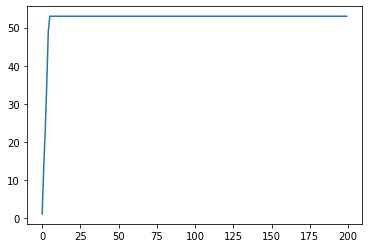

In [6]:
plt.plot(global_outcome)

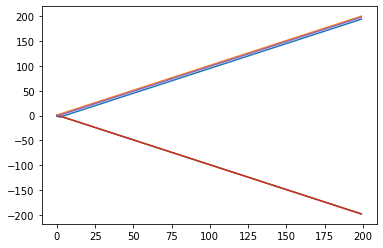

In [7]:
random_agents = np.random.choice(101, size=5, replace=False)

for a in random_agents:
    plt.plot(agent_scores[a,:])

In [8]:
config = dict(N_agents=101,
                  memory_span=6,
                  n_strategies=2)

In [9]:
%%time
sim = MinorityGame(**config)
global_outcome, agent_scores = sim.run(T=200)

CPU times: user 81.2 ms, sys: 638 µs, total: 81.9 ms
Wall time: 77.9 ms


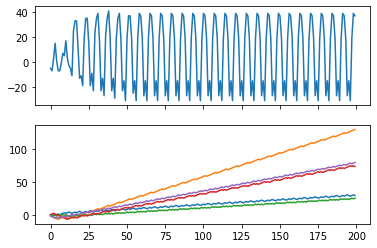

In [10]:
fig, axs = plt.subplots(nrows=2, sharex=True)
axs[0].plot(global_outcome)


random_agents = np.random.choice(101, size=5, replace=False)

for a in random_agents:
    axs[1].plot(agent_scores[a,:])

In [11]:
config['n_strategies'] = 4

In [12]:
%%time
sim = MinorityGame(**config)
global_outcome, agent_scores = sim.run(T=200)

CPU times: user 75.6 ms, sys: 0 ns, total: 75.6 ms
Wall time: 73.7 ms


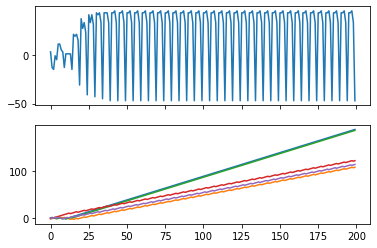

In [13]:
fig, axs = plt.subplots(nrows=2, sharex=True)
axs[0].plot(global_outcome)


random_agents = np.random.choice(101, size=5, replace=False)

for a in random_agents:
    axs[1].plot(agent_scores[a,:])

In [14]:
sim = MinorityGame(**config)
global_outcome, agent_scores = sim.run(T=2000, timed=True)

Function run took 0.58s to run.


In [15]:
%%prun
sim = MinorityGame(**config)
global_outcome, agent_scores = sim.run(T=2000)

In [16]:
import json

In [17]:
json_object = json.dumps(config, indent = 4) 

In [18]:
json_object

'{\n    "N_agents": 101,\n    "memory_span": 6,\n    "n_strategies": 4\n}'

In [19]:
print(json_object)

{
    "N_agents": 101,
    "memory_span": 6,
    "n_strategies": 4
}


In [24]:
with open('./minority_config.json') as jfile:
    aa = json.load(jfile)

In [25]:
aa

{'N_agents': 101, 'memory_span': 6, 'n_strategies': 4}

In [22]:
json.load('./minority_config.json')

AttributeError: 'str' object has no attribute 'read'